## General cleaning 

In [1]:
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GDF=pd.read_csv("/kaggle/input/chemicals-in-cosmetics/MakeupChemicalsCleaned.csv")

In [3]:
GDF.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'Color/Scent/Flavor', 'CompanyId',
       'CompanyName', 'BrandName', 'PrimaryCategoryId', 'PrimaryCategory',
       'SubCategoryId', 'SubCategory', 'CasId', 'CasNumber', 'ChemicalId',
       'ChemicalName', 'InitialDateReported', 'MostRecentDateReported',
       'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt',
       'ChemicalDateRemoved', 'TotalChemicalReported'],
      dtype='object')

In [4]:
GDF = GDF.rename(
    columns ={
        "CSF":"Color/Scent/Flavor",
        "ChemicalCount": "TotalChemicalReported"
    }
)
GDF.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'Color/Scent/Flavor', 'CompanyId',
       'CompanyName', 'BrandName', 'PrimaryCategoryId', 'PrimaryCategory',
       'SubCategoryId', 'SubCategory', 'CasId', 'CasNumber', 'ChemicalId',
       'ChemicalName', 'InitialDateReported', 'MostRecentDateReported',
       'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt',
       'ChemicalDateRemoved', 'TotalChemicalReported'],
      dtype='object')

In [5]:
GDF.isnull().any()

CDPHId                    False
ProductName               False
CSFId                     False
Color/Scent/Flavor        False
CompanyId                 False
CompanyName               False
BrandName                 False
PrimaryCategoryId         False
PrimaryCategory           False
SubCategoryId             False
SubCategory               False
CasId                     False
CasNumber                 False
ChemicalId                False
ChemicalName              False
InitialDateReported       False
MostRecentDateReported    False
DiscontinuedDate          False
ChemicalCreatedAt         False
ChemicalUpdatedAt         False
ChemicalDateRemoved       False
TotalChemicalReported     False
dtype: bool

In [6]:
GDF[GDF["BrandName"].isna() == 1]

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported


In [7]:
GDF = GDF.fillna(0)
GDF.isnull().any()

CDPHId                    False
ProductName               False
CSFId                     False
Color/Scent/Flavor        False
CompanyId                 False
CompanyName               False
BrandName                 False
PrimaryCategoryId         False
PrimaryCategory           False
SubCategoryId             False
SubCategory               False
CasId                     False
CasNumber                 False
ChemicalId                False
ChemicalName              False
InitialDateReported       False
MostRecentDateReported    False
DiscontinuedDate          False
ChemicalCreatedAt         False
ChemicalUpdatedAt         False
ChemicalDateRemoved       False
TotalChemicalReported     False
dtype: bool

In [8]:
GDF.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
114376    False
114377    False
114378    False
114379    False
114380    False
Length: 114381, dtype: bool

In [9]:
GDF=GDF.drop_duplicates()

In [10]:
GDF['ProductName'] = GDF['ProductName'].str.title()

GDF["ProductName"]

0          Ultra Color Rich Extra Plump Lipstick-All Shades
1                                Glover'S Medicated Shampoo
2                                Glover'S Medicated Shampoo
3                  Precision Glimmer Eye Liner-All Shades �
4               Avon Brilliant Shine Lip Gloss-All Shades �
                                ...                        
114376                 Hydra-Lip Translucent Color Lipstick
114377                 Hydra-Lip Translucent Color Lipstick
114378                 Hydra-Lip Translucent Color Lipstick
114379                 Hydra-Lip Translucent Color Lipstick
114380    Old Spice Gentlemens Blend Aloe And Wild Sage ...
Name: ProductName, Length: 114381, dtype: object

In [11]:
GDF.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
Color/Scent/Flavor         object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
TotalChemicalReported       int64
dtype: object

In [12]:
GDF = GDF.astype(
    {
    "CompanyName": "str",
    "Color/Scent/Flavor": "str",
    "BrandName":"str",
    "PrimaryCategory":"str",
    "SubCategory":"str",
    "ChemicalName": "str" 
    }
)
GDF.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
Color/Scent/Flavor         object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
TotalChemicalReported       int64
dtype: object

## BrandName cleaning
"Sephora" BrandName has three types of names, some of them with spaces and with and without uppercase, so I'll unify them.

In [13]:
GDF[GDF["BrandName"] == "Sephora "]

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported
19872,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11756.0,01- Gingre Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19873,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11757.0,02- Litchi Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19874,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11758.0,03- Peach Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19875,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11759.0,04 - Mango Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19876,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11760.0,05- Passion Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59236,21726,Creme Cc Peau Parfaite / Skin Perfect Cc Cream...,32185.0,Dark,198,S+,Sephora,44,Makeup Products (non-permanent),50,...,13463-67-7,33086,Titanium dioxide,12/11/2013,12/11/2013,0,12/11/2013,12/11/2013,0,1
59237,21726,Creme Cc Peau Parfaite / Skin Perfect Cc Cream...,32186.0,Deep,198,S+,Sephora,44,Makeup Products (non-permanent),50,...,13463-67-7,33086,Titanium dioxide,12/11/2013,12/11/2013,0,12/11/2013,12/11/2013,0,1
59238,21727,Full Action Lagoon / Extreme Effect Mascara La...,0.0,0,198,S+,Sephora,44,Makeup Products (non-permanent),162,...,13463-67-7,33087,Titanium dioxide,12/11/2013,12/11/2013,0,12/11/2013,12/11/2013,0,1
59239,21728,Studio De Nail Art / Nail Paint Studio,0.0,0,198,S+,Sephora,59,Nail Products,65,...,13463-67-7,33088,Titanium dioxide,12/11/2013,12/11/2013,0,12/11/2013,12/11/2013,0,1


In [14]:
GDF = GDF.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

GDF[GDF["BrandName"] == "Sephora "]

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported


In [15]:
GDF["BrandName"] = GDF["BrandName"].replace(["SEPHORA"], "Sephora")
GDF[GDF["BrandName"] == "SEPHORA"]

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported


In [16]:
GDF[GDF["BrandName"]=="Sephora"]

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported
19872,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11756.0,01- Gingre Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19873,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11757.0,02- Litchi Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19874,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11758.0,03- Peach Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19875,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11759.0,04 - Mango Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19876,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11760.0,05- Passion Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114086,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),49,...,12001-26-2,67840,Mica,04/22/2020,04/24/2020,0,04/24/2020,04/24/2020,0,3
114087,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,67830,Titanium dioxide,04/22/2020,04/24/2020,0,04/22/2020,04/24/2020,0,3
114088,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,14807-96-6,67831,Talc,04/22/2020,04/24/2020,0,04/22/2020,04/22/2020,0,3
114089,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,108-88-3,67839,Toluene,04/22/2020,04/24/2020,0,04/24/2020,04/24/2020,04/24/2020,3


Now I'll clean product names that have the BrandName in the ProductName and alternative name in other languages 

In [17]:
replacements = {
    "Sephora - Colorful Ombre A Paupieres Declipsable / Colorful Removable Eyeshadow Pan": "Colorful Removable Eyeshadow Pan",
    "Colorful Ombre A Paupieres Declipsable / Colorful Removable Eyeshadow Pan": "Colorful Removable Eyeshadow Pan",
    "Sephora - Gel Gloss Ultra Brillant / Ultra Shine Lip Gel": "Ultra Shine Lip Gel",
    "Sephora - Rouge Veloute Sans Transfert / Cream Lip Stain": "Cream Lip Stain",
    "Sephora - Fond De Teint Perfection 10H / 10Hr Wear Perfection Foundation": "10Hr Wear Perfection Foundation" ,
    "Revlon Super Lustrous Creme Lipstick Restage": "Super Lustrous Creme Lipstick Restage",
    "Revlon Blush Reno": "Blush Reno"
}
GDF["ProductName"] = GDF["ProductName"].replace(replacements)

GDF[GDF["ProductName"].isin([
    "Ultra Shine Lip Gel",
    "Cream Lip Stain",
    "10Hr Wear Perfection Foundation"
])]


,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported
45508,16039,Cream Lip Stain,23900.0,01 - always red,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,24467,Titanium dioxide,01/31/2011,01/31/2011,0,01/31/2011,01/31/2011,0,1
45509,16039,Cream Lip Stain,23901.0,02 - classic beige,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,24467,Titanium dioxide,01/31/2011,01/31/2011,0,01/31/2011,01/31/2011,0,1
45510,16039,Cream Lip Stain,23902.0,03 - strawberry kissed,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,24467,Titanium dioxide,01/31/2011,01/31/2011,0,01/31/2011,01/31/2011,0,1
45511,16039,Cream Lip Stain,23903.0,04 - endless purple,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,24467,Titanium dioxide,01/31/2011,01/31/2011,0,01/31/2011,01/31/2011,0,1
45512,16039,Cream Lip Stain,23904.0,05 - infinite rose,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,24467,Titanium dioxide,01/31/2011,01/31/2011,0,01/31/2011,01/31/2011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101270,36751,10Hr Wear Perfection Foundation,58720.0,11.5 Ecru rose (P) / 11.5 Pink ecru (P),198,S+,Sephora,44,Makeup Products (non-permanent),50,...,13463-67-7,60078,Titanium dioxide,03/07/2019,03/07/2019,0,03/07/2019,03/07/2019,0,1
101271,36751,10Hr Wear Perfection Foundation,58721.0,4. Porcelaine clair (P) / 4. Light porcelain (P),198,S+,Sephora,44,Makeup Products (non-permanent),50,...,13463-67-7,60078,Titanium dioxide,03/07/2019,03/07/2019,0,03/07/2019,03/07/2019,0,1
101272,36751,10Hr Wear Perfection Foundation,58722.0,3. Perle (P) / 3. Pearl (P),198,S+,Sephora,44,Makeup Products (non-permanent),50,...,13463-67-7,60078,Titanium dioxide,03/07/2019,03/07/2019,0,03/07/2019,03/07/2019,0,1
101273,36751,10Hr Wear Perfection Foundation,58723.0,67. Expresso (N) / 67. Expresso (N),198,S+,Sephora,44,Makeup Products (non-permanent),50,...,13463-67-7,60078,Titanium dioxide,03/07/2019,03/07/2019,0,03/07/2019,03/07/2019,0,1


I'll make a list of the chemicals reported so we can get to know them.

In [18]:
Chemicals = GDF["ChemicalName"].unique().tolist()
Chemicals

['Titanium dioxide',
 'Distillates (coal tar)',
 'Estragole',
 'Cocamide diethanolamine',
 'Toluene',
 'Chromium (hexavalent compounds)',
 'Retinol',
 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
 'Vitamin A',
 'Vitamin A palmitate',
 'Butylated hydroxyanisole',
 'Coffea arabica extract',
 'Lauramide diethanolamine',
 'Coffee',
 'Silica, crystalline (airborne particles of respirable size)',
 'Carbon black (airborne, unbound particles of respirable size)',
 'Carbon black',
 'Genistein (purified)',
 'Progesterone',
 '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
 'Methyleugenol',
 'Carbon-black extracts',
 'Retinyl palmitate',
 'o-Phenylphenol',
 'Acrylamide',
 'Formaldehyde (gas)',
 'Ginkgo biloba extract',
 'Mica',
 'Ethylene glycol',
 'Acetic acid, retinyl ester',
 'Ethyl acrylate',
 'Trade Secret',
 'Methanol',
 'Mineral oils, untreated and mildly treated',
 'Diethanolamine',
 'TEA-Lauryl Sulfate',
 'Retiny

In [19]:
TotalChemicals = __builtins__.len(Chemicals)
TotalChemicals

123

In [20]:
TotalData = __builtins__.len(GDF)
TotalData

114381

## What's the most present chemical in make up?

In [21]:
ChemicalCounts = GDF["ChemicalName"].value_counts()
FrecuentChemicals = ChemicalCounts[ChemicalCounts>=100]
FrecuentChemicals

ChemicalName
Titanium dioxide                                                                                       93479
Silica, crystalline (airborne particles of respirable size)                                             2816
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
Carbon black                                                                                            1758
Talc                                                                                                    1549
Cocamide diethanolamine                                                                                 1397
Retinyl palmitate                                                                                       1181
Vitami

In [22]:
TitaniumCount= (GDF ["ChemicalName"] == "Titanium dioxide").sum()
Percentage = (TitaniumCount/TotalData)*100
Percentage


81.72598595920651

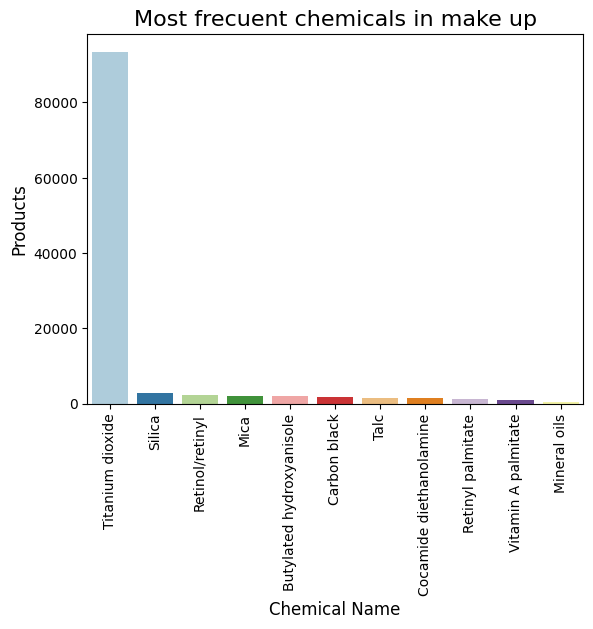

In [23]:
sns.barplot(
    x=ChemicalCounts[ChemicalCounts >= 500].index, 
    y=ChemicalCounts[ChemicalCounts >= 500].values, 
    palette="Paired"
)

plt.xticks(rotation=90)
plt.style.use('seaborn-v0_8-whitegrid')

#Name modifications:

NewLabels=ChemicalCounts[ChemicalCounts>=500].index.to_list()
NewLabels = [
    "Silica" if name == "Silica, crystalline (airborne particles of respirable size)"
             else "Retinol/retinyl" if name == "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents."
             else "Mineral oils" if name == "Mineral oils, untreated and mildly treated"
             else name for name in NewLabels
]

plt.xticks(
    ticks=range(__builtins__.len(NewLabels)), 
    labels=NewLabels,
    rotation=90
)

plt.title(
    "Most frecuent chemicals in make up",
    fontsize=16,
    loc='center'
)

plt.xlabel(
    "Chemical Name", 
    fontsize=12
)

plt.ylabel(
    "Products", 
    fontsize=12
);

## What products have Titanium dioxide?
As seen before, titanium dioxide is the most present chemical in make up products, this is important because based on the experimental evidence from animal inhalation studies TiO2 nanoparticles are classified as “possible carcinogenic to humans” by the International Agency for Research on Cancer and as occupational carcinogen by the National Institute for Occupational Safety and Health.

In [24]:
ProductCounts = GDF[
      GDF["ChemicalName"].str.contains("Titanium dioxide", case=False, na=False)
]["ProductName"].value_counts()

ProductCounts

ProductName
Eyecolor                                                    766
Nail Lacquer                                                540
Nyx Girls Nail Polish                                       462
Eye Shadow                                                  361
Lipstick                                                    353
                                                           ... 
Rimmel - London The Max Volume Flash Bold Curves Mascara      1
Rimmel - London The Max Volume Flash Waterproof Mascara       1
Rimmel - London Sexy Curves Full Body Mascara                 1
Rimmel - London Scandal'Eyes Waterproof Mascara               1
Old Spice Gentlemens Blend Aloe And Wild Sage Bar Soap        1
Name: count, Length: 29093, dtype: int64

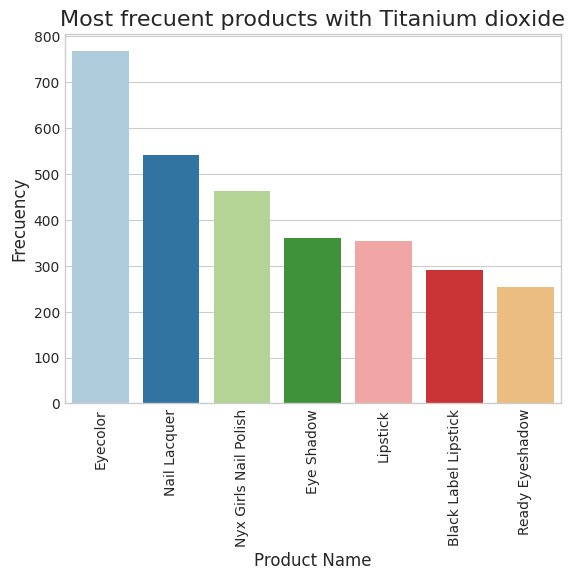

In [25]:
sns.barplot(
    x = ProductCounts[ProductCounts >= 250].index, 
    y = ProductCounts[ProductCounts >= 250].values,
    palette = "Paired")

plt.xticks(rotation = 90);

plt.title(
    "Most frecuent products with Titanium dioxide",
    fontsize = 16,
    loc = 'center'
);
plt.xlabel(
    "Product Name", 
    fontsize=12
)
plt.ylabel(
    "Frecuency", 
    fontsize=12
);
plt.style.use('seaborn-v0_8-whitegrid')


## What brands use more frecuently Titanium dioxide in their produtcs?

In [26]:
BrandsCounts = GDF[
       GDF["ChemicalName"].str.contains("Titanium dioxide", case=False, na=False)
    ]["BrandName"].value_counts()
BrandsCounts

BrandName
Sephora                        3990
bareMinerals                   3140
Revlon                         2308
NARS                           2050
tarte                          2039
                               ... 
KANEBO IB                         1
Perfect skin                      1
KANEBO SILK                       1
Claudia Stevens - CTG / CYG       1
Calvin Klein Beauty               1
Name: count, Length: 1991, dtype: int64

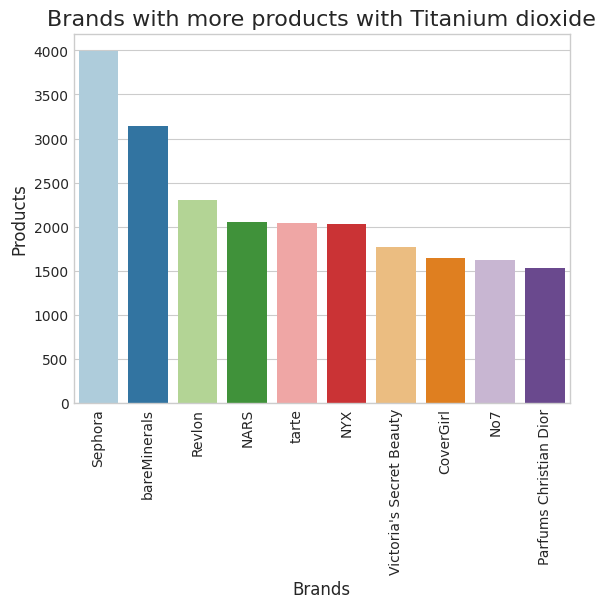

In [27]:
sns.barplot(
    x=BrandsCounts[BrandsCounts >= 1500].index, 
    y=BrandsCounts[BrandsCounts >= 1500].values,
    palette="Paired"
)

plt.xticks(rotation=90)
plt.title(
    "Brands with more products with Titanium dioxide",
    fontsize=16, 
    loc='center'
)
plt.xlabel(
    "Brands",
    fontsize=12
)

plt.ylabel(
    "Products",
    fontsize=12
)
plt.style.use('seaborn-v0_8-whitegrid')

## Analyzing Sephora products 

In [28]:
SephoraProd= GDF[
    (GDF["BrandName"] == "Sephora") & 
    (GDF["ChemicalName"].str.contains("Titanium dioxide", case=False, na=False))
]
SephoraProd

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported
19872,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11756.0,01- Gingre Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19873,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11757.0,02- Litchi Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19874,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11758.0,03- Peach Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19875,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11759.0,04 - Mango Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
19876,5088,Nectar Shine Hydrating Care Lipgloss Spf8,11760.0,05- Passion Shine,198,S+,Sephora,44,Makeup Products (non-permanent),52,...,13463-67-7,8856,Titanium dioxide,10/15/2009,12/30/2010,0,10/15/2009,10/15/2009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114071,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),45,...,13463-67-7,67830,Titanium dioxide,04/22/2020,04/24/2020,0,04/22/2020,04/24/2020,0,3
114075,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),46,...,13463-67-7,67830,Titanium dioxide,04/22/2020,04/24/2020,0,04/22/2020,04/24/2020,0,3
114079,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),48,...,13463-67-7,67830,Titanium dioxide,04/22/2020,04/24/2020,0,04/22/2020,04/24/2020,0,3
114083,41419,Sephora - Wild Wishes - Makeup Palette,64850.0,Eye pencil,198,S+,Sephora,44,Makeup Products (non-permanent),49,...,13463-67-7,67830,Titanium dioxide,04/22/2020,04/24/2020,0,04/22/2020,04/24/2020,0,3


In [29]:
SepProdCounts = SephoraProd['ProductName'].value_counts()
SepProdCounts

ProductName
Colorful Removable Eyeshadow Pan                                          186
Cream Lip Stain                                                            78
Eyeshadow                                                                  72
Ultra Shine Lip Gel                                                        68
10Hr Wear Perfection Foundation                                            64
                                                                         ... 
Rouge Veloute Sans Transfert / Cream Lip Stain 10 Everlasting Burgundy      1
Sun Disk                                                                    1
Sephora - Wonderful Dreams                                                  1
Sephora - Color Wishes                                                      1
Sephora - Gloss / Lipgloss                                                  1
Name: count, Length: 622, dtype: int64

I'll define "Other" for  pruducs with Titanium dioxide with low count, in order to have a better understanding of the graphic

In [30]:
other = SepProdCounts[SepProdCounts <=60].sum() 
other

3522

In [31]:
SepProdCountsModificado = SepProdCounts[SepProdCounts> 60]

SepProdCountsModificado["Other"] = other

SepProdCountsModificado

ProductName
Colorful Removable Eyeshadow Pan     186
Cream Lip Stain                       78
Eyeshadow                             72
Ultra Shine Lip Gel                   68
10Hr Wear Perfection Foundation       64
Other                               3522
Name: count, dtype: int64

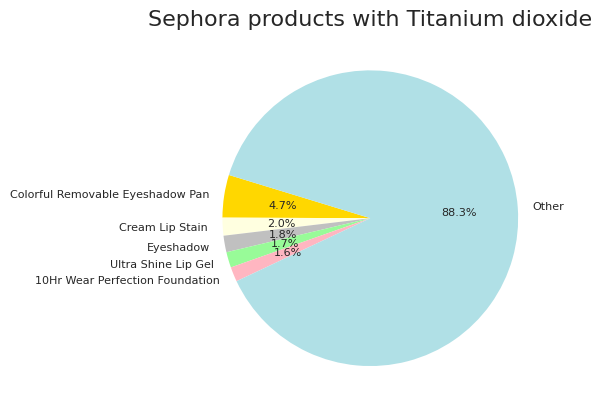

In [32]:
CustomColors=[
    "gold",
    "lightyellow", 
    "silver",
    "palegreen",
    "lightpink",
    "powderblue"
]
plt.pie(
    SepProdCountsModificado.values,
    labels=SepProdCountsModificado.index, 
    autopct='%1.1f%%',
    startangle=163,
    textprops={'fontsize': 8},
    colors=CustomColors
)
plt.title(
    "Sephora products with Titanium dioxide",
    fontsize=16,
    loc='center'
);

## Analyzing bareMinerals products 

In [33]:
#Definir df con los productos de bareMinerals con dioxido de Titanio

BareMinProd= GDF[
      (GDF["BrandName"] == "bareMinerals") & 
      (GDF["ChemicalName"].str.contains("Titanium dioxide", case=False, na=False))
     ]
BareMinProd

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported
1719,780,Eyecolor,1240.0,Wild Beauty,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,821,Titanium dioxide,09/11/2009,09/21/2016,0,09/11/2009,09/11/2009,0,1
1720,780,Eyecolor,1241.0,Wild Woman,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,821,Titanium dioxide,09/11/2009,09/21/2016,0,09/11/2009,09/11/2009,0,1
1721,780,Eyecolor,1242.0,Wild Woman Dawn,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,821,Titanium dioxide,09/11/2009,09/21/2016,0,09/11/2009,09/11/2009,0,1
1722,780,Eyecolor,1243.0,Wild Woman Debra,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,821,Titanium dioxide,09/11/2009,09/21/2016,0,09/11/2009,09/11/2009,0,1
1723,780,Eyecolor,1244.0,Wild Woman Melissa,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,821,Titanium dioxide,09/11/2009,09/21/2016,0,09/11/2009,09/11/2009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109216,39705,Bounce & Blur Eyeshadow,62085.0,Stormy Sky,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,64975,Titanium dioxide,09/27/2019,09/27/2019,0,09/27/2019,09/27/2019,0,1
109223,39709,Bounce & Blur Blush,62086.0,Mauve Sunrise,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),45,...,13463-67-7,64982,Titanium dioxide,09/27/2019,09/27/2019,0,09/27/2019,09/27/2019,0,1
109224,39709,Bounce & Blur Blush,62087.0,Pink Sky,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),45,...,13463-67-7,64982,Titanium dioxide,09/27/2019,09/27/2019,0,09/27/2019,09/27/2019,0,1
109225,39709,Bounce & Blur Blush,62088.0,Coral Cloud�,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),45,...,13463-67-7,64982,Titanium dioxide,09/27/2019,09/27/2019,0,09/27/2019,09/27/2019,0,1


In [34]:
BareMinCount = BareMinProd['ProductName'].value_counts()
BareMinCount

ProductName
Eyecolor                                      766
Ready Eyeshadow                               254
Liner Shadow                                  198
Barepro Performance Wear Powder Foundation    123
Blush                                         123
                                             ... 
Bareskin Sheer Sun Serum Bronzer                1
Faux Tan Body Oil                               1
Prime Time Neutralizing Foundation Primer       1
Prime Time Luminous Gold Foundation Primer      1
Blemish Therapy                                 1
Name: count, Length: 134, dtype: int64

In [35]:
otherBM = BareMinCount[BareMinCount <=100].sum() 
otherBM

1568

In [36]:
BareMinCountModificado = BareMinCount[BareMinCount> 100]
BareMinCountModificado["Other"] = otherBM 
BareMinCountModificado

ProductName
Eyecolor                                       766
Ready Eyeshadow                                254
Liner Shadow                                   198
Barepro Performance Wear Powder Foundation     123
Blush                                          123
Ready Foundation Spf 20                        108
Other                                         1568
Name: count, dtype: int64

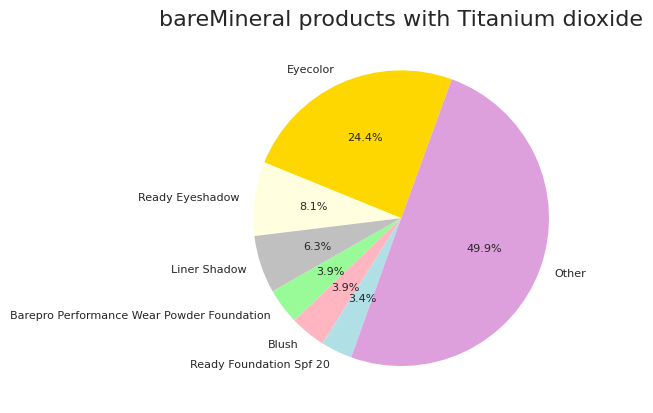

In [37]:
CustomColors = [
    "gold",
    "lightyellow",
    "silver",
    "palegreen",
    "lightpink", 
    "powderblue",
    "plum"
]

plt.pie(
    BareMinCountModificado.values,
    labels = BareMinCountModificado.index, 
    autopct = '%1.1f%%',
    startangle = 70,
    colors = CustomColors,textprops={'fontsize': 8}
);

plt.title(
    "bareMineral products with Titanium dioxide", 
    fontsize=16,
    loc='center'
);

## Analyzing Revlon products

In [38]:
RevlonProd= GDF[
    (GDF["BrandName"] == "Revlon") & 
    (GDF["ChemicalName"].str.contains("Titanium dioxide", case=False, na=False))
  ]
RevlonProd

,CDPHId,ProductName,CSFId,Color/Scent/Flavor,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,TotalChemicalReported
63,46,Colorstay 12 Hour Eye Shadow Quad- Copper Spic...,0.0,0,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,...,13463-67-7,53,Titanium dioxide,08/25/2009,08/26/2009,0,08/25/2009,08/25/2009,0,1
210,57,Colorstay 12 Hour Eye Shadow Quad- Peach 98,0.0,0,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,...,13463-67-7,64,Titanium dioxide,08/26/2009,08/26/2009,0,08/26/2009,08/26/2009,0,1
211,58,Colorstay 12 Hour Eye Shadow Quad- Copper 97,0.0,0,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,...,13463-67-7,65,Titanium dioxide,08/26/2009,08/26/2009,0,08/26/2009,08/26/2009,0,1
212,59,Colorstay 12 Hour Eye Shadow Quad- Bronze 96,0.0,0,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,...,13463-67-7,66,Titanium dioxide,08/26/2009,08/26/2009,0,08/26/2009,08/26/2009,0,1
213,60,Colorstay 12 Hour Eye Shadow Quad- Coffee Bean...,0.0,0,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,...,13463-67-7,67,Titanium dioxide,08/26/2009,08/26/2009,0,08/26/2009,08/26/2009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111115,40547,Revlon Skin Light Face Illuminator [Sunburst B...,62897.0,Sunrise Luster,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),50,...,13463-67-7,66388,Titanium dioxide,11/27/2019,11/27/2019,0,11/27/2019,11/27/2019,0,1
111480,40654,Revlon Kiss Melting Lipstick Wonder Woman Ii H...,63168.0,Warrior,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),53,...,13463-67-7,66549,Titanium dioxide,12/16/2019,12/16/2019,0,12/16/2019,12/16/2019,0,1
111481,40654,Revlon Kiss Melting Lipstick Wonder Woman Ii H...,63169.0,Courageous,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),53,...,13463-67-7,66549,Titanium dioxide,12/16/2019,12/16/2019,0,12/16/2019,12/16/2019,0,1
111517,40658,Revlon Glow Balm Peonyglow,63205.0,Lily Glow,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),51,...,13463-67-7,66553,Titanium dioxide,12/16/2019,12/16/2019,0,12/16/2019,12/16/2019,0,1


In [39]:
RevlonCount = RevlonProd['ProductName'].value_counts()
RevlonCount

ProductName
Super Lustrous Creme Lipstick Restage    116
Blush Reno                                85
Colorstay Makeup Combo/Oily               72
Ultra Hd Latex Lip Gloss                  66
Colorsilk Rev Cs Pp                       63
                                        ... 
Renewist Lipcolor- Smooth Sangria          1
Renewist Lipcolor- Cherry Desirable        1
Renewist Lipcolor- Juicy Apricot           1
Renewist Lipcolor- Succulent Peach         1
Revlon Kiss Sugar Scrub Sweet Mint         1
Name: count, Length: 1010, dtype: int64

In [40]:
otherRv = RevlonCount[RevlonCount <=60].sum() 
otherRv

1906

In [41]:
RevlonModificado = RevlonCount[RevlonCount> 60]
RevlonModificado["Other"] = otherRv
RevlonModificado

ProductName
Super Lustrous Creme Lipstick Restage     116
Blush Reno                                 85
Colorstay Makeup Combo/Oily                72
Ultra Hd Latex Lip Gloss                   66
Colorsilk Rev Cs Pp                        63
Other                                    1906
Name: count, dtype: int64

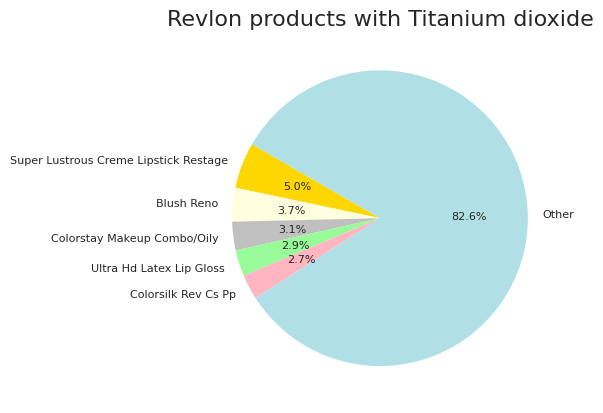

In [42]:
CustomColors=[
    "gold",
    "lightyellow", 
    "silver", 
    "palegreen",
    "lightpink",
    "powderblue",
    "plum"
]
plt.pie(
    RevlonModificado.values,
    labels=RevlonModificado.index, 
    autopct='%1.1f%%', 
    startangle=150,
    colors=CustomColors,
    textprops={'fontsize': 8}
);

plt.title(
    "Revlon products with Titanium dioxide",
    fontsize=16, 
    loc='center'
);

## Products with titanium dioxide in time

In [43]:
TitDio = GDF.loc[
       GDF["ChemicalName"] == "Titanium dioxide",
        ["ProductName", 
         "BrandName",
         "ChemicalName",
         "InitialDateReported",
         "MostRecentDateReported",
         "DiscontinuedDate",
         "ChemicalCreatedAt",
         "ChemicalUpdatedAt", 
         "ChemicalDateRemoved"]
  ].copy()
TitDio

,ProductName,BrandName,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,Ultra Color Rich Extra Plump Lipstick-All Shades,AVON,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,0
3,Precision Glimmer Eye Liner-All Shades �,AVON,Titanium dioxide,07/09/2009,08/28/2013,0,07/09/2009,07/09/2009,0
4,Avon Brilliant Shine Lip Gloss-All Shades �,AVON,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,0
5,Jillian Dempsey For Avon Celestial Eyeshadow-A...,AVON,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,0
6,Absolute Precision Color Powder System - All S...,OPI,Titanium dioxide,07/13/2009,12/30/2010,0,12/04/2009,12/04/2009,0
...,...,...,...,...,...,...,...,...,...
114376,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,06/19/2020,06/19/2020,0,06/19/2020,06/19/2020,0
114377,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,06/19/2020,06/19/2020,0,06/19/2020,06/19/2020,0
114378,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,06/19/2020,06/19/2020,0,06/19/2020,06/19/2020,0
114379,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,06/19/2020,06/19/2020,0,06/19/2020,06/19/2020,0


Getting a new column with the year of each column of dates 

In [44]:
DateCol = [
    "InitialDateReported",
    "MostRecentDateReported",
    "DiscontinuedDate", 
    "ChemicalCreatedAt",
    "ChemicalUpdatedAt",
    "ChemicalDateRemoved"
]
for col in DateCol: 
    TitDio[col] = pd.to_datetime(TitDio[col], format="%m/%d/%Y", errors = "coerce")
    TitDio[f"Year{col}"] = TitDio[col].dt.year
TitDio

,ProductName,BrandName,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,YearInitialDateReported,YearMostRecentDateReported,YearDiscontinuedDate,YearChemicalCreatedAt,YearChemicalUpdatedAt,YearChemicalDateRemoved
0,Ultra Color Rich Extra Plump Lipstick-All Shades,AVON,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN
3,Precision Glimmer Eye Liner-All Shades �,AVON,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,2009,2013,NaN,2009,2009,NaN
4,Avon Brilliant Shine Lip Gloss-All Shades �,AVON,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN
5,Jillian Dempsey For Avon Celestial Eyeshadow-A...,AVON,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,2009,2013,2010.0,2009,2009,NaN
6,Absolute Precision Color Powder System - All S...,OPI,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,2009,2010,NaN,2009,2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114376,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN
114377,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN
114378,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN
114379,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN


Getting a df with the products that haven't being removed from titanium dioxide or discontinued

In [45]:
TitDio2 = TitDio[
     pd.isna(TitDio["DiscontinuedDate"]) & 
     pd.isna(TitDio["ChemicalDateRemoved"])]
TitDio2

,ProductName,BrandName,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,YearInitialDateReported,YearMostRecentDateReported,YearDiscontinuedDate,YearChemicalCreatedAt,YearChemicalUpdatedAt,YearChemicalDateRemoved
3,Precision Glimmer Eye Liner-All Shades �,AVON,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,2009,2013,NaN,2009,2009,NaN
6,Absolute Precision Color Powder System - All S...,OPI,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,2009,2010,NaN,2009,2009,NaN
7,Absolute Precision Color Powder System - All S...,OPI,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,2009,2010,NaN,2009,2009,NaN
8,Absolute Precision Color Powder System - All S...,OPI,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,2009,2010,NaN,2009,2009,NaN
9,Absolute Precision Color Powder System Opaque ...,ABSOLUTE,Titanium dioxide,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT,2009,2010,NaN,2010,2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114376,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN
114377,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN
114378,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN
114379,Hydra-Lip Translucent Color Lipstick,YANBAL,Titanium dioxide,2020-06-19,2020-06-19,NaT,2020-06-19,2020-06-19,NaT,2020,2020,NaN,2020,2020,NaN


In [46]:
TitDio2Count = TitDio2['YearMostRecentDateReported'].value_counts()
TitDio2Count

YearMostRecentDateReported
2010    18005
2019    15637
2018     7697
2016     6696
2013     5782
2014     5665
2017     5242
2015     4858
2011     3500
2009     3306
2020     2657
2012     2648
Name: count, dtype: int64

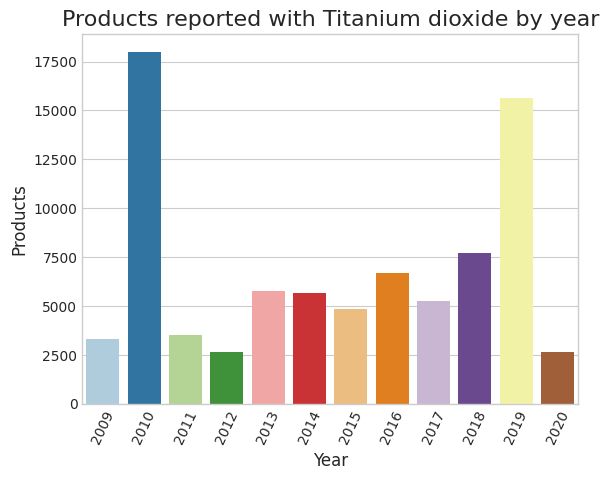

In [47]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.barplot(
    x=TitDio2Count.index, 
    y=TitDio2Count.values,
    palette="Paired"
)
plt.xticks(rotation=65);

plt.title(
    "Products reported with Titanium dioxide by year",
    fontsize=16,
    loc='center'
);

plt.xlabel(
    "Year", 
    fontsize=12
)

plt.ylabel(
    "Products",
    fontsize=12
);


Creating a dataframe with the discontinued products

In [48]:
TitDioDisc = TitDio.dropna(subset = ["DiscontinuedDate"]).copy()
TitDioDisc

,ProductName,BrandName,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,YearInitialDateReported,YearMostRecentDateReported,YearDiscontinuedDate,YearChemicalCreatedAt,YearChemicalUpdatedAt,YearChemicalDateRemoved
0,Ultra Color Rich Extra Plump Lipstick-All Shades,AVON,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN
4,Avon Brilliant Shine Lip Gloss-All Shades �,AVON,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN
5,Jillian Dempsey For Avon Celestial Eyeshadow-A...,AVON,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,2009,2013,2010.0,2009,2009,NaN
30,Spectra Lash Mascara �,AVON,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,2009,2013,2012.0,2009,2009,NaN
381,Anew Eyelifting Serum Shadow-All Shades �,ANEW,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2009,2013,2012.0,2009,2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111748,Sexy Mother Pucker Mini Gloss Sticks - Glossed...,Soap & Glory,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,2019,2019,2019.0,2019,2019,NaN
112489,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN
112490,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN
112491,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN


How many years where the products in the market?

In [49]:
TitDioDisc["YearsUntilDiscontinued"] = TitDioDisc["YearDiscontinuedDate"]- TitDioDisc["YearInitialDateReported"]
TitDioDisc

,ProductName,BrandName,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,YearInitialDateReported,YearMostRecentDateReported,YearDiscontinuedDate,YearChemicalCreatedAt,YearChemicalUpdatedAt,YearChemicalDateRemoved,YearsUntilDiscontinued
0,Ultra Color Rich Extra Plump Lipstick-All Shades,AVON,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN,2.0
4,Avon Brilliant Shine Lip Gloss-All Shades �,AVON,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN,2.0
5,Jillian Dempsey For Avon Celestial Eyeshadow-A...,AVON,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,2009,2013,2010.0,2009,2009,NaN,1.0
30,Spectra Lash Mascara �,AVON,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,2009,2013,2012.0,2009,2009,NaN,3.0
381,Anew Eyelifting Serum Shadow-All Shades �,ANEW,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2009,2013,2012.0,2009,2009,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111748,Sexy Mother Pucker Mini Gloss Sticks - Glossed...,Soap & Glory,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,2019,2019,2019.0,2019,2019,NaN,0.0
112489,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN,-6.0
112490,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN,-6.0
112491,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN,-6.0


In [50]:
print(TitDioDisc["YearsUntilDiscontinued"].unique())

[  2.   1.   3.   4.   0.  10.  -1.   6.   5.   7.  -3.  -2.   8.   9.
  -4.  -5.  -6. -12.  -7.]


In [51]:
TitDioDisc["YearsUntilDiscontinued"] = pd.to_numeric(TitDioDisc["YearsUntilDiscontinued"], errors='coerce').astype("Int64")

TitDioDisc

,ProductName,BrandName,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,YearInitialDateReported,YearMostRecentDateReported,YearDiscontinuedDate,YearChemicalCreatedAt,YearChemicalUpdatedAt,YearChemicalDateRemoved,YearsUntilDiscontinued
0,Ultra Color Rich Extra Plump Lipstick-All Shades,AVON,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN,2
4,Avon Brilliant Shine Lip Gloss-All Shades �,AVON,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,2009,2013,2011.0,2009,2009,NaN,2
5,Jillian Dempsey For Avon Celestial Eyeshadow-A...,AVON,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,2009,2013,2010.0,2009,2009,NaN,1
30,Spectra Lash Mascara �,AVON,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,2009,2013,2012.0,2009,2009,NaN,3
381,Anew Eyelifting Serum Shadow-All Shades �,ANEW,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2009,2013,2012.0,2009,2009,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111748,Sexy Mother Pucker Mini Gloss Sticks - Glossed...,Soap & Glory,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,2019,2019,2019.0,2019,2019,NaN,0
112489,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN,-6
112490,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN,-6
112491,Hello Flawless,Benefit Cosmetics,Titanium dioxide,2020-01-22,2020-01-22,2014-02-15,2020-01-22,2020-01-22,NaT,2020,2020,2014.0,2020,2020,NaN,-6


Mean of products that have titanium dioxide in market 

In [52]:
mean = TitDioDisc[TitDioDisc['YearsUntilDiscontinued'] >= 0]['YearsUntilDiscontinued'].mean()
mean

2.438468003361748

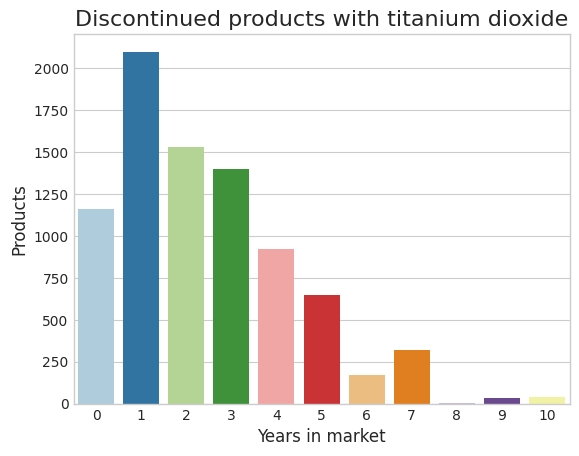

In [53]:
TitDioDiscCount = TitDioDisc[TitDioDisc['YearsUntilDiscontinued'] >= 0]['YearsUntilDiscontinued'].value_counts()

plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    x=TitDioDiscCount.index, 
    y=TitDioDiscCount.values,
    palette="Paired"
)
plt.title(
    "Discontinued products with titanium dioxide",
    fontsize=16,
    loc='center'
);

plt.xlabel(
    "Years in market", 
    fontsize=12
)

plt.ylabel(
    "Products",
     fontsize=12
          );
